In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

for computer vision fastai.vision

for text fastai.text

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/home/jupyter/.fastai/data/imdb_sample/data_save.pkl'),
 PosixPath('/home/jupyter/.fastai/data/imdb_sample/texts.csv')]

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


Reviews -- each review classified as a negative or positive -- label



Training set has 25000 movie reviews, to predict +ve or -ve

NN bunch of matrix multipliers and non linearities

We start with random parameters and train to recognize what is +ve and -ve

Understnad and interpret the meaning of the review is difficult

so the trick is to learn Transfer learning



TRANSFER LEARNING IN NLP

We use a pre trained model that is trained to use to our condition. 

In the case of computer vision, we use a library of 1000s of imaages and then use to train the model of a completely different category/things


In NLP we are using a language model

Language model

model that is used to predict the next word of a sentence-- to do that we need to have world knowledge and English knowledge

Every single word can be used to predict next word. 

Example: 
1. In the case of movie reviews, we can use it as the data set to predic the next words
2. Use wikipedia -- build language model on all of the wikipedia -- billions of data

Pre trained wikitext model for NLP -- understand English and world knowlege

Use wikitext model as transfer learning --- this case lables are built in the dataset itself


Finetune it with the data of your application

fastai has modelzoo for different language




In [5]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

Text data bunch -- language model specific databunch and create a learner from it

In [6]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [7]:
data_lm.save()

In [8]:
data = load_data(path)

## Tokenization

Each thing with spaces represent a single linguistic concept -- find words that are very rare and stores it as special token

Token of words


ex: san fransisco -- it contains two tokens.
it's -- 2 tokens

punctuations each token

Each token is a word -- the DL model figures out which is the best weight

loaded as a classification databunch.. we have target lables too.  we have a token for each part of the word 



In [9]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


## Numericalization

In [9]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

#### vocab gives the list of all the unique tokens -- this gives the first 10 items 

Replace every movie review with a list of numbers-- each token has a number

In [10]:
data.train_ds[0][0]

Text xxbos xxmaj most italian horror lovers seem to hate this movie since because it has no connection to the first two xxmaj demons films . xxmaj and with the " xxmaj demons xxup iii " in the title , one would assume it would . xxmaj the problem is that this film was never intended to be part of the xxmaj demons series . xxmaj the distributors only a " xxmaj demons xxup iii " above its original title " xxmaj the xxmaj ogre " to cash in on the other films popularity . xxmaj the new xxmaj american xxup dvd release of this picture has the title " xxmaj demons xxup iii : xxmaj the xxmaj ogre " on the box art but the film itself only says " xxmaj the xxmaj ogre " . i do n't know if past releases had the title " xxmaj demons xxup iii " on the actual film itself , but this new release just seems to be a little white lie . xxmaj if you can get past the " xxmaj demons xxup iii " in the title , you might some enjoyment in " xxmaj the xxmaj ogre " . xxmaj it starts out with a creep intro , and s

In [11]:
data.train_ds[0][0].data[:10]

array([   2,    5,  109, 1705,  219, 1574,  326,   15,  984,   21])

Replace token with ids of where is the token in the vocab ---- Numericalization

Every word in the vocab requires a separate row in the weight matrix - this would result in weight matrix getting too huge - we restrict the vocab to no more than 60,000 words. We only keep the ones that appear at least twice

Once we have extracted tokens from our texts, we convert to integers by creating a list of all the words used. We only keep the ones that appear at least twice with a maximum vocabulary size of 60,000 (by default) and replace the ones that don't make the cut by the unknown token `UNK`.


## Datablock API

Datablock api does everything at once -- tokenization, Numericalization and creating a databunch

Independent variable -- text
coming from_csv

how do you want to split it into validation vs training -- col2 is validation
label -- column =0

In [12]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

## Model

In NLP we have 2 models

1. Language model 
2. Classifier

In [10]:
bs=48

In [11]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train'),
 PosixPath('/home/jupyter/.fastai/data/imdb/README'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/jupyter/.fastai/data/imdb/test'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tmp_clas')]

This is the whole data set 

25000 in training


25000 in validation


50000 unsupervised

In [12]:
(path/'train').ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/neg'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/labeledBow.feat')]

We are not going to train wikitext 103, it takes a long time. we start with fine tuning this language model


Each document is a text file

Even though train, test and validation set are given. All the three are different based on the lables. so in this, we are excluding the lables and using the data for training.

thus split by rand -- takes 10% of the data for validation of the language model 

So we are adding training and test set and use the entire set as the language model

Language model -- has its own lables-- text itself is the lable -- thus label for lm is used for labeling


The output of this is databunch

In [13]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [14]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [15]:
data_lm.show_batch()


idx,text
0,"female viewing market by creating yet another re - hash of ' mis - understood , brooding bad - boy ' ( xxmaj andrei ) meets ' innocent , whimsical beauty ' ( xxmaj paula ) . \n \n xxmaj rather than waste any time in creating an original premise , the filmmakers went straight for the money - shot : the bad boy being tamed by said whimsical"
1,"indeed ! xxmaj later in the film , when the prima donna is behaving abominably , her husband punches her in the face and everyone applauds him ! xxmaj it seems like the film , at times , wants to appeal to the lowest common denominator in the audience xxup plus they ca n't even do this well -- with some of the worst acting i 've seen in a"
2,big brother assuming he 'd be hungry for a bottle or some nourishment or a diaper change ? xxmaj he should have been screaming non - stop after that many hours without care . xxmaj definitely stupid to take the baby from a safe place when he did n't need to . \n \n xxmaj and why was the road miraculously clear whenever anyone wanted to drive somewhere ?
3,"you 're saying . xxmaj and if you 're a blonde gal , that means that he 'll do whatever you tell him to do . xxmaj that fact is not lost on xxmaj dr. xxmaj who ( xxmaj xxunk xxmaj xxunk ) and xxmaj madame xxmaj piranha ( xxmaj mie xxmaj hama ) -- representing a "" nation which shall not be named "" -- who plan on using"
4,"xxup being xxup there ? xxbos i 've never been a huge fan of xxmaj mormon films . xxmaj being a xxmaj mormon , i 've always felt that the humor was too exclusive to the xxup lds community and made us seem like a bunch of obsessive wackos . i was hoping this would be the breath of fresh air , the xxmaj halestorm movie i could finally discuss"


Language model learner

This case we use RNN instead of CNN

Pretrained model is used AWD_LSTM

drop out rate -- regularization to avoid underfitting

In [16]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [17]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


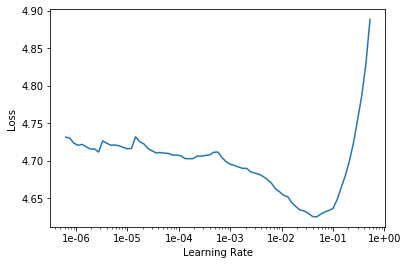

In [18]:
learn.recorder.plot(skip_end=15)

In [ ]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

We are finetuning the last layers

In [ ]:
learn.save('fit_head')

In [ ]:
learn.load('fit_head');

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

In [ ]:
learn.save('fine_tuned')

In [ ]:
learn.load('fine_tuned');

Then unfreeze and then fit again.. it takes a long time..

The accuracy is 0.3 -- guess the next word every 1/3rd time

Language model finds this very good 



Give the start of the sentence and it will try to finish off the sentence

In [20]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [ ]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

We have a language model 

In our case it is movie review model

We are going to save it and load it into as a pretrained model in the classifier 

Second half of the language model is about predicting the next word, rather than understanding the sentence so far

Encoder -- understanding the sentence is required for the movie classificaiton review.

So instead of the entire model, we save encoder-- understanding part

In [ ]:
learn.save_encoder('fine_tuned_enc')

## Classifier

In [ ]:
path = untar_data(URLs.IMDB)

Create a databunch

with the path

we need to use the same vocab as in the language model -- if word 10 is the in the language model, the classifier should also have the same vocab

labels of the test set are not to be used.. hence we split by folder

labels are not language model-- here it is two classes

create a databunch

In [ ]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [ ]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj titanic directed by xxmaj james xxmaj cameron presents a fictional love story on the historical setting of the xxmaj titanic . xxmaj the plot is simple , xxunk , or not for those who love plots that twist and turn and keep you in suspense . xxmaj the end of the movie can be figured out within minutes of the start of the film , but the love",pos
"xxbos xxmaj here are the matches . . . ( adv . = advantage ) \n\n xxmaj the xxmaj warriors ( xxmaj ultimate xxmaj warrior , xxmaj texas xxmaj tornado and xxmaj legion of xxmaj doom ) v xxmaj the xxmaj perfect xxmaj team ( xxmaj mr xxmaj perfect , xxmaj ax , xxmaj smash and xxmaj crush of xxmaj demolition ) : xxmaj ax is the first to go",neg
"xxbos i felt duty bound to watch the 1983 xxmaj timothy xxmaj dalton / xxmaj zelah xxmaj clarke adaptation of "" xxmaj jane xxmaj eyre , "" because i 'd just written an article about the 2006 xxup bbc "" xxmaj jane xxmaj eyre "" for xxunk . \n\n xxmaj so , i approached watching this the way i 'd approach doing homework . \n\n i was irritated at first",pos
"xxbos xxmaj no , this is n't a sequel to the fabulous xxup ova series , but rather a remake of the events that occurred after the death of xxmaj xxunk ( and the disappearance of xxmaj woodchuck ) . xxmaj it is also more accurate to the novels that inspired this wonderful series , which is why characters ( namely xxmaj orson and xxmaj xxunk ) are xxunk ,",pos


We can then create a model to classify those reviews and load the encoder we saved before.

We are using text classifier learner

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.310078,0.197204,0.926960


In [ ]:
learn.save('first')

In [ ]:
learn.load('first');

Instead of unfreeze we say freeze (-2) -- unfreeze last 2 layers and train a little more

In the slice, lowest layer of the model to the highest layer of the model

NLP rnns -- 2.6 


In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.255913,0.169186,0.937800


In [ ]:
learn.save('second')

In [ ]:
learn.load('second');

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.223174,0.165679,0.939600


In [ ]:
learn.save('third')

In [ ]:
learn.load('third');

For training RNN -- it helps to decrease the moms

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.240424,0.155204,0.943160
2,0.217462,0.153421,0.943960


In [ ]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([7.5928e-04, 9.9924e-01]))